In [1]:
import pandas as pd
import numpy as np
import sidetable as stb
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
df = pd.read_csv('../datos/bikes.csv', index_col = 0)

In [3]:
df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
200,201,20-07-2018,autumn,0,7,0,3,1,1,31.501653,37.34250,70.7083,7.625739,644,3688,4332
117,118,28-04-2018,summer,0,4,0,4,1,2,25.317500,28.94645,70.0833,21.500836,569,3489,4058
121,122,02-05-2018,summer,0,5,0,1,1,2,22.515847,26.64165,73.0000,12.291418,847,3554,4401
563,564,18-07-2019,autumn,1,7,0,3,1,1,32.526653,37.27915,57.7083,9.208614,799,4914,5713
95,96,06-04-2018,summer,0,4,0,3,1,1,16.024153,19.38040,47.0833,17.625221,413,2395,2808
587,588,11-08-2019,autumn,1,8,0,6,0,2,28.392500,31.91335,73.2917,13.834093,2247,4052,6299
389,390,25-01-2019,spring,1,1,0,3,1,1,12.060847,14.74105,64.3750,10.791757,467,3803,4270
492,493,08-05-2019,summer,1,5,0,2,1,2,23.848347,27.87355,68.5833,19.833943,738,4990,5728
510,511,26-05-2019,summer,1,5,0,6,0,1,28.392500,32.13480,73.2500,13.332464,2855,3681,6536
615,616,08-09-2019,autumn,1,9,0,6,0,2,27.025847,30.55605,79.9167,18.833968,1557,4419,5976


day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (spring, summer, autumn, winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [4]:
df.shape

(730, 16)

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


In [7]:
df.stb.missing().T

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total,730.0,730.0,730.0,730.0,730.0,730.0,730.0,730.0,730.0,730.0,730.0,730.0,730.0,730.0,730.0,730.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


In [9]:
df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5])

In [10]:
df.describe(include='object').T

,count,unique,top,freq
dteday,730,730,01-01-2018,1
season,730,4,autumn,188


In [11]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
df.duplicated().sum()

0

In [13]:
df['dteday'] = df['dteday'].apply(pd.to_datetime)

/tmp/ipykernel_725/2705059384.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['dteday'] = df['dteday'].apply(pd.to_datetime)


In [14]:
df['month'] = df['dteday'].dt.month_name()

In [15]:
df['year'] = df['dteday'].dt.year

In [16]:
df['weekday'] = df['dteday'].dt.day_name()

In [17]:
df['day'] = df['dteday'].dt.day

In [18]:
df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,year,day
126,127,2018-07-05,summer,0,5,0,Thursday,0,1,21.320000,25.63105,54.1250,10.750150,1612,3102,4714,July,2018,5
91,92,2018-02-04,summer,0,4,0,Sunday,0,2,12.915000,15.78185,65.3750,13.208782,898,1354,2252,February,2018,4
116,117,2018-04-27,summer,0,4,0,Friday,1,2,25.420000,28.75710,83.5417,20.917400,547,3325,3872,April,2018,27
541,542,2019-06-26,autumn,1,6,0,Wednesday,1,1,25.864153,29.73520,37.3333,23.292014,1077,6365,7442,June,2019,26
257,258,2018-09-15,autumn,0,9,0,Saturday,1,2,23.677500,27.68355,70.9167,18.166782,428,3231,3659,September,2018,15
397,398,2019-02-02,spring,1,2,0,Saturday,1,2,16.365847,19.94855,67.2917,12.541529,190,3571,3761,February,2019,2
429,430,2019-06-03,spring,1,3,0,Monday,1,1,10.591653,12.75210,45.6667,13.458625,221,3735,3956,June,2019,3
145,146,2018-05-26,summer,0,5,0,Saturday,1,1,29.041653,32.73440,67.7500,13.376014,758,3919,4677,May,2018,26
2,3,2018-03-01,spring,0,1,0,Thursday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,March,2018,1
261,262,2018-09-19,autumn,0,9,0,Wednesday,1,2,22.515847,26.48375,69.0000,10.166714,691,3848,4539,September,2018,19


In [19]:
df.drop(['yr', 'mnth', 'season'], inplace = True, axis = 1)

In [20]:
df.head()

,instant,dteday,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,year,day
0,1,2018-01-01,0,Monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,January,2018,1
1,2,2018-02-01,0,Thursday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,February,2018,1
2,3,2018-03-01,0,Thursday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,March,2018,1
3,4,2018-04-01,0,Sunday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,April,2018,1
4,5,2018-05-01,0,Tuesday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,May,2018,1


In [21]:
# definir los límites de los intervalos para cada temporada
intervalos = [pd.Timestamp('2017-12-31'),pd.Timestamp('2018-03-20'), pd.Timestamp('2018-06-21'), pd.Timestamp('2018-09-22'), pd.Timestamp('2018-12-22'), 
              pd.Timestamp('2019-03-20'), pd.Timestamp('2019-06-21'), pd.Timestamp('2019-09-22'), pd.Timestamp('2019-12-22'), pd.Timestamp('2019-12-31')]
etiquetas = ['Winter', 'Spring', 'Summer', 'Autumn', 'Winter', 'Spring', 'Summer', 'Autumn','Winter']

# categorizar las fechas por temporada
df['season'] = pd.cut(df['dteday'], bins=intervalos, labels=etiquetas, ordered = False)

In [22]:
df.head()

,instant,dteday,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,year,day,season
0,1,2018-01-01,0,Monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,January,2018,1,Winter
1,2,2018-02-01,0,Thursday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,February,2018,1,Winter
2,3,2018-03-01,0,Thursday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,March,2018,1,Winter
3,4,2018-04-01,0,Sunday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,April,2018,1,Spring
4,5,2018-05-01,0,Tuesday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,May,2018,1,Spring


In [23]:
df['season'].value_counts()

Spring    186
Summer    186
Autumn    182
Winter    176
Name: season, dtype: int64

In [24]:
numericas = df.select_dtypes(include = np.number)

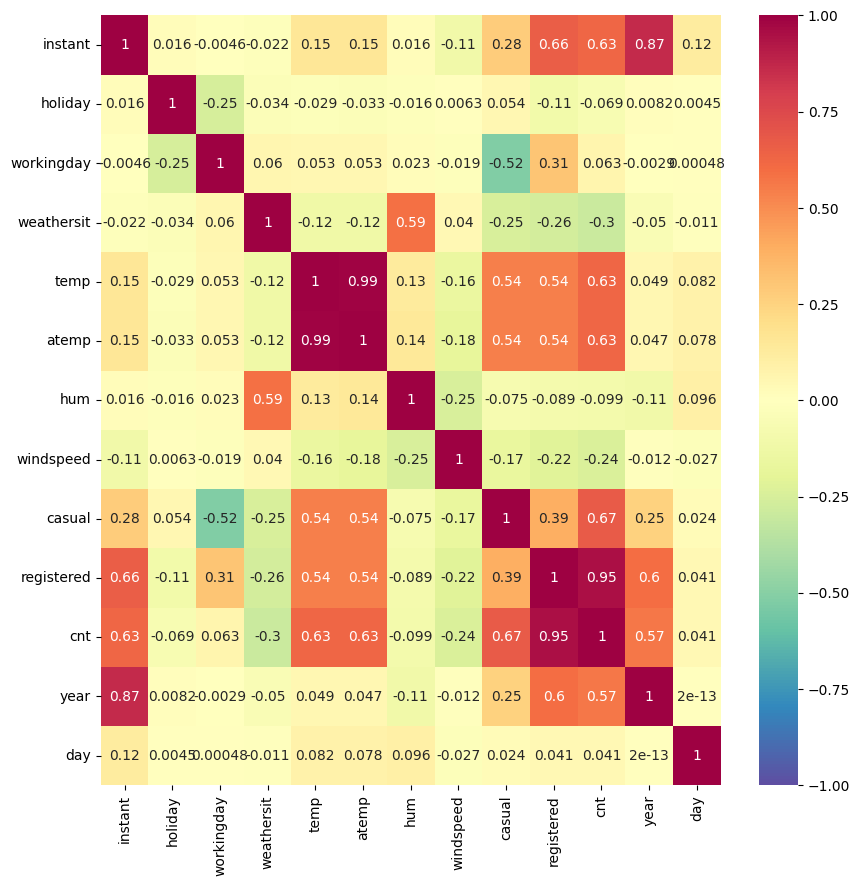

In [25]:
plt.figure(figsize = (10, 10))
sns.heatmap(numericas.corr(), 
            annot = True, 
            vmin= -1,
            vmax= 1,
            cmap = 'Spectral_r');

In [26]:
numericas.drop(['instant', 'holiday', 'workingday', 'weathersit', 'cnt', 'year', 'day'], axis = 1, inplace = True)
numericas.head()

,temp,atemp,hum,windspeed,casual,registered
0,14.110847,18.18125,80.5833,10.749882,331,654
1,14.902598,17.68695,69.6087,16.652113,131,670
2,8.050924,9.47025,43.7273,16.636703,120,1229
3,8.200000,10.60610,59.0435,10.739832,108,1454
4,9.305237,11.46350,43.6957,12.522300,82,1518


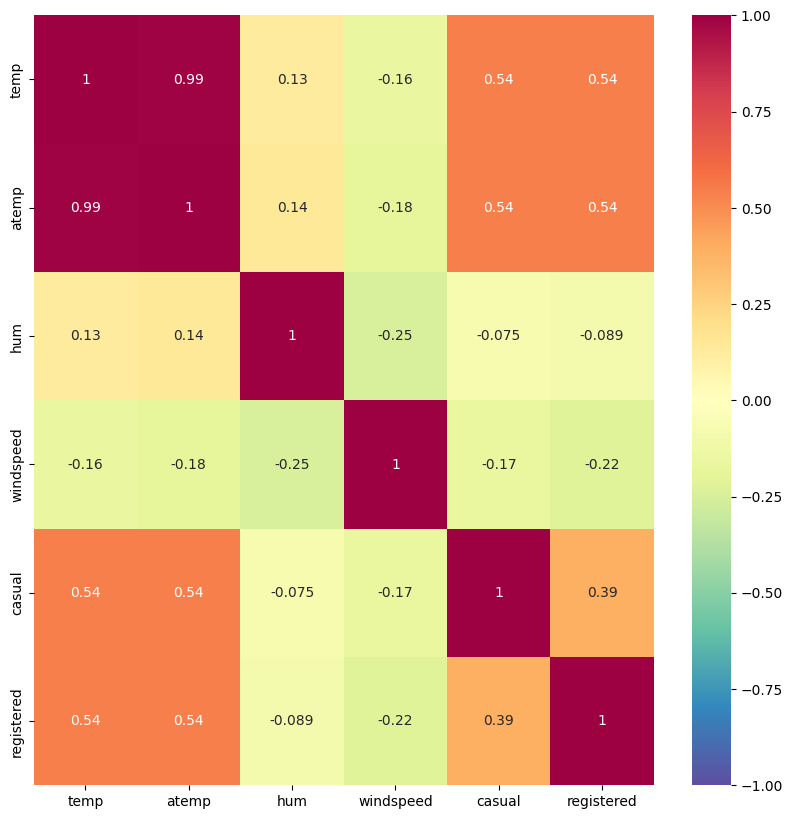

In [27]:
plt.figure(figsize = (10, 10))
sns.heatmap(numericas.corr(), 
            annot = True, 
            vmin= -1,
            vmax= 1,
            cmap = 'Spectral_r');

La columna 'atemp' nos da la misma información que 'temp' por lo tanto la eliminamos.

In [28]:
df.drop('atemp', axis = 1, inplace = True)

In [29]:
df.head()

,instant,dteday,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,month,year,day,season
0,1,2018-01-01,0,Monday,0,2,14.110847,80.5833,10.749882,331,654,985,January,2018,1,Winter
1,2,2018-02-01,0,Thursday,0,2,14.902598,69.6087,16.652113,131,670,801,February,2018,1,Winter
2,3,2018-03-01,0,Thursday,1,1,8.050924,43.7273,16.636703,120,1229,1349,March,2018,1,Winter
3,4,2018-04-01,0,Sunday,1,1,8.200000,59.0435,10.739832,108,1454,1562,April,2018,1,Spring
4,5,2018-05-01,0,Tuesday,1,1,9.305237,43.6957,12.522300,82,1518,1600,May,2018,1,Spring


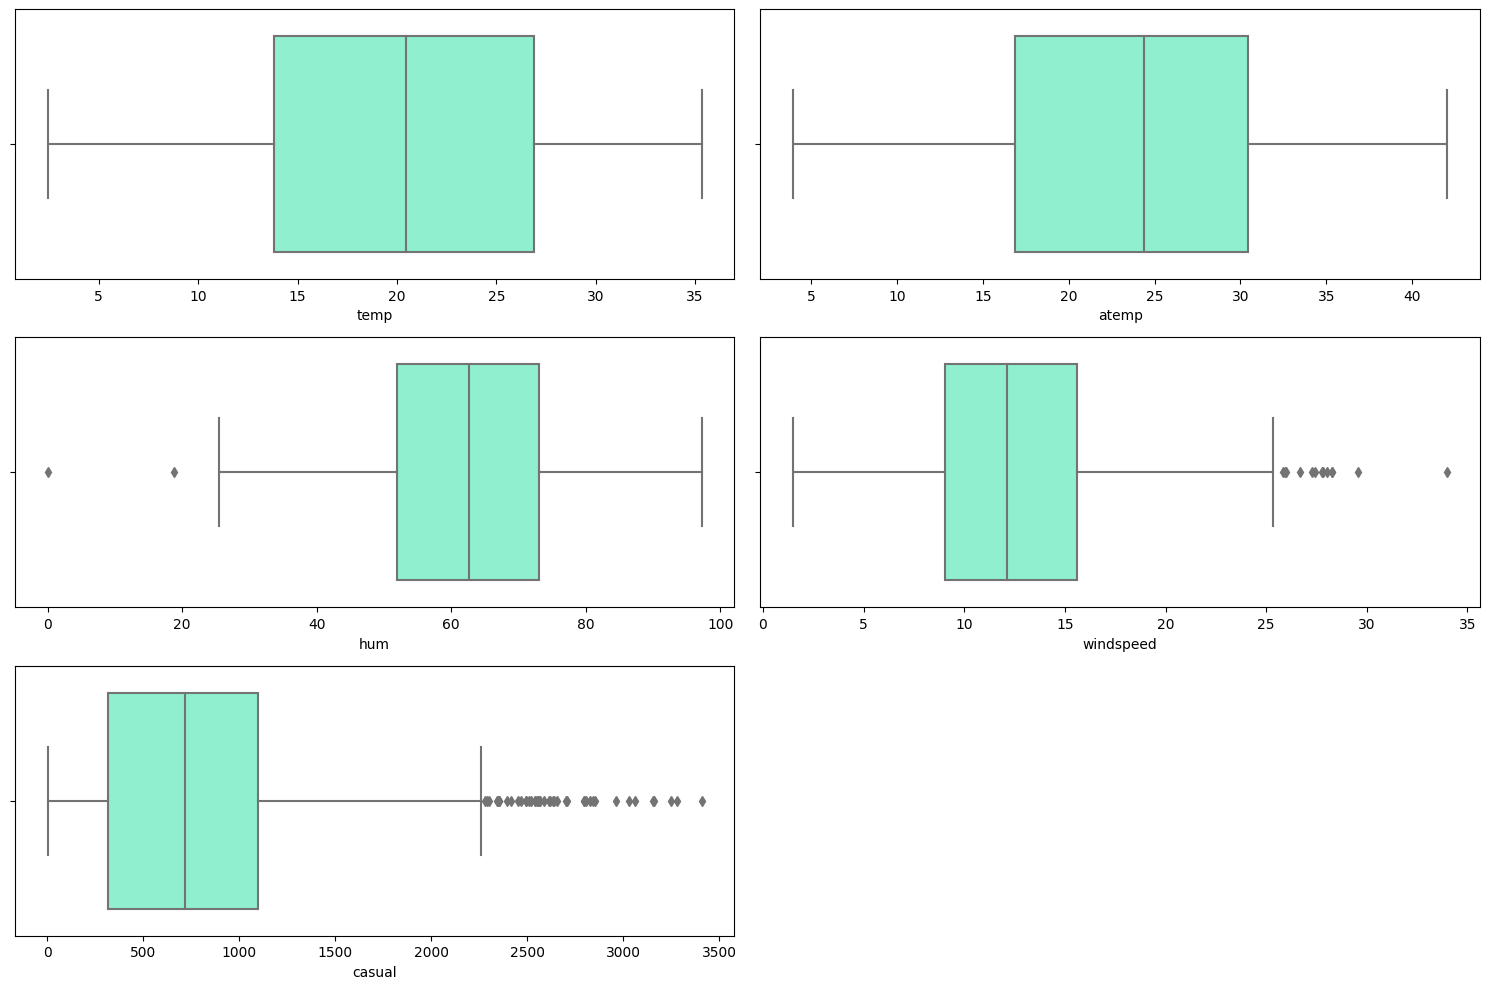

In [30]:
fig, axes = plt.subplots(3, 2, figsize=(15,10))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show();

In [31]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
    
    return dicc_indices

In [32]:
outliers = detectar_outliers(numericas.columns, numericas)
outliers

{'hum': [49, 68],
 'windspeed': [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720],
 'casual': [148,
  183,
  184,
  196,
  246,
  281,
  440,
  446,
  454,
  455,
  461,
  468,
  469,
  475,
  489,
  496,
  503,
  504,
  510,
  511,
  512,
  517,
  518,
  524,
  531,
  532,
  538,
  539,
  549,
  559,
  567,
  580,
  594,
  608,
  609,
  616,
  622,
  629,
  630,
  636,
  643,
  657,
  664,
  679]}

In [33]:
outliers['casual']

[148,
 183,
 184,
 196,
 246,
 281,
 440,
 446,
 454,
 455,
 461,
 468,
 469,
 475,
 489,
 496,
 503,
 504,
 510,
 511,
 512,
 517,
 518,
 524,
 531,
 532,
 538,
 539,
 549,
 559,
 567,
 580,
 594,
 608,
 609,
 616,
 622,
 629,
 630,
 636,
 643,
 657,
 664,
 679]

In [34]:
df_outliers_casual = df[df['casual'].isin(outliers['casual'])].sort_values(by = 'dteday')
df_outliers_casual

,instant,dteday,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,month,year,day,season
274,275,2018-02-10,0,Saturday,0,2,14.623347,79.1667,14.874871,616,2302,2918,February,2018,10,Winter
49,50,2018-02-19,0,Monday,0,1,16.365847,18.7917,34.000021,532,1103,1635,February,2018,19,Winter
277,278,2018-05-10,0,Thursday,1,1,22.071653,64.7917,11.875750,559,4267,4826,May,2018,10,Spring
6,7,2018-07-01,0,Sunday,1,2,8.057402,49.8696,11.304642,148,1362,1510,July,2018,1,Summer
128,129,2018-09-05,0,Wednesday,1,1,21.832500,58.8750,11.792000,664,3698,4362,September,2018,5,Summer
263,264,2018-09-21,0,Friday,1,2,24.395000,90.0000,6.459081,539,3813,4352,September,2018,21,Summer
314,315,2018-11-11,1,Sunday,0,1,13.290847,44.6250,21.083225,440,2928,3368,November,2018,11,Autumn
386,387,2019-01-22,0,Tuesday,0,2,6.662500,79.6250,13.375746,196,1781,1977,January,2019,22,Winter
425,426,2019-02-03,0,Sunday,1,2,14.486653,65.7083,9.708568,246,2948,3194,February,2019,3,Winter
419,420,2019-02-24,0,Sunday,1,2,16.707500,73.7500,15.916989,246,3241,3487,February,2019,24,Winter


In [35]:
df_outliers_casual['season'].value_counts()

Winter    6
Spring    5
Autumn    3
Summer    3
Name: season, dtype: int64

In [36]:
casual_outs_numeric = df_outliers_casual.select_dtypes(include = np.number)

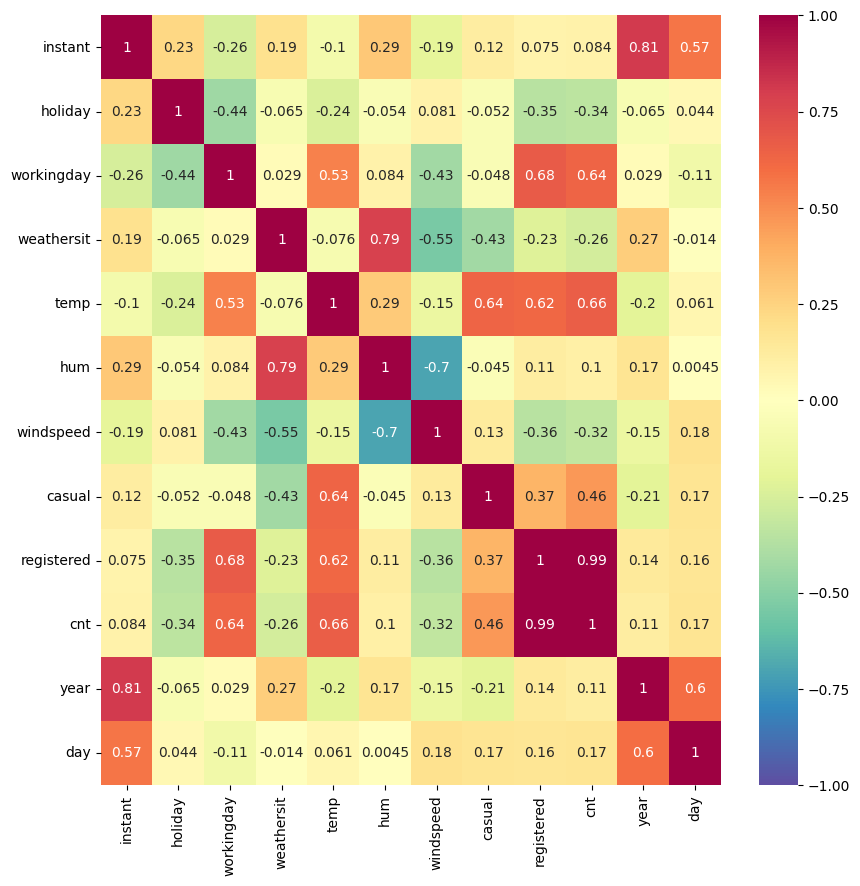

In [37]:
plt.figure(figsize = (10, 10))
sns.heatmap(casual_outs_numeric.corr(), 
            annot = True, 
            vmin= -1,
            vmax= 1,
            cmap = 'Spectral_r');

In [38]:
df.drop(['instant', 'dteday'], axis = 1, inplace= True)
df.head()

,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,month,year,day,season
0,0,Monday,0,2,14.110847,80.5833,10.749882,331,654,985,January,2018,1,Winter
1,0,Thursday,0,2,14.902598,69.6087,16.652113,131,670,801,February,2018,1,Winter
2,0,Thursday,1,1,8.050924,43.7273,16.636703,120,1229,1349,March,2018,1,Winter
3,0,Sunday,1,1,8.200000,59.0435,10.739832,108,1454,1562,April,2018,1,Spring
4,0,Tuesday,1,1,9.305237,43.6957,12.522300,82,1518,1600,May,2018,1,Spring


In [39]:
df_num = df.filter(['temp', 'hum', 'windspeed', 'casual', 'registered','cnt'])

In [40]:
df_num.head()

,temp,hum,windspeed,casual,registered,cnt
0,14.110847,80.5833,10.749882,331,654,985
1,14.902598,69.6087,16.652113,131,670,801
2,8.050924,43.7273,16.636703,120,1229,1349
3,8.200000,59.0435,10.739832,108,1454,1562
4,9.305237,43.6957,12.522300,82,1518,1600


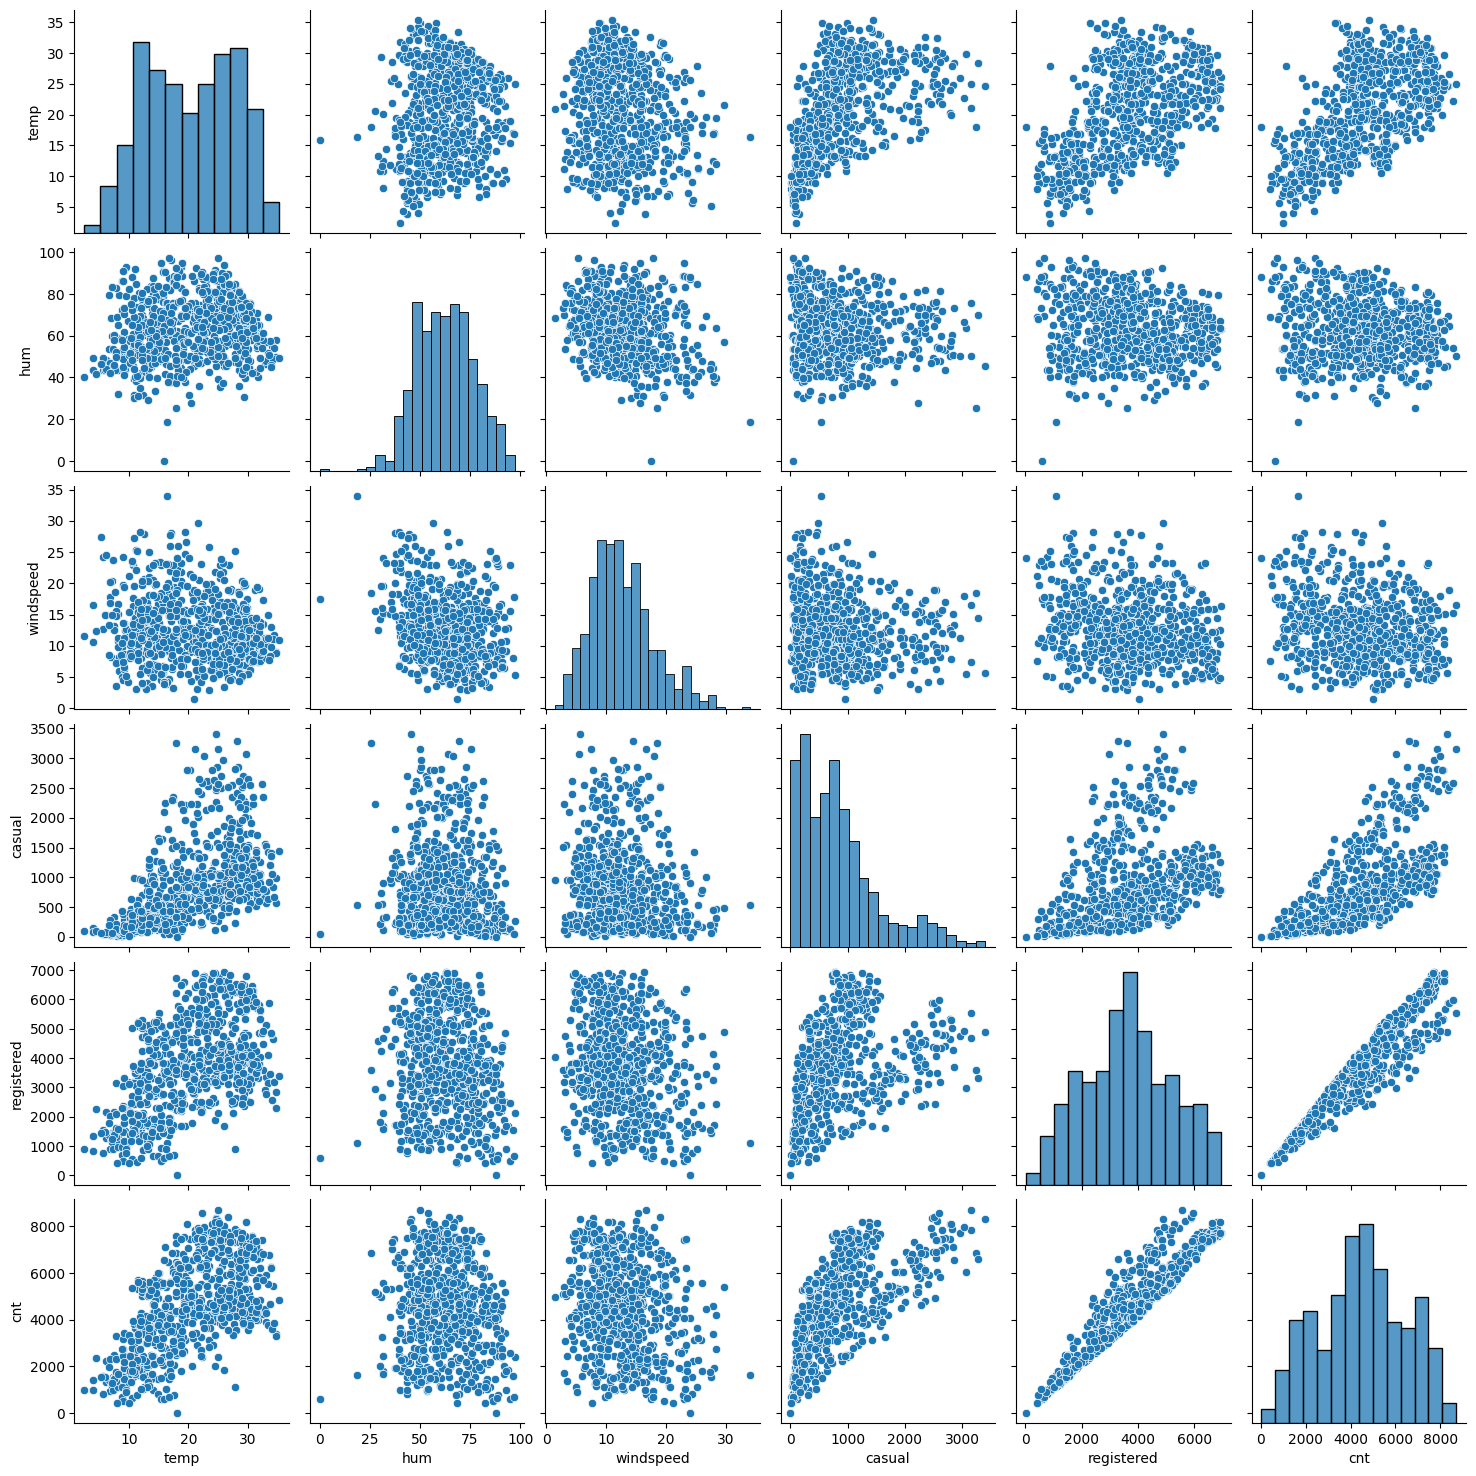

In [41]:
sns.pairplot(df_num)

In [42]:
df.head(2)

,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,month,year,day,season
0,0,Monday,0,2,14.110847,80.5833,10.749882,331,654,985,January,2018,1,Winter
1,0,Thursday,0,2,14.902598,69.6087,16.652113,131,670,801,February,2018,1,Winter


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
casual,730.0,849.249315,686.479875,2.000000,316.250000,717.000000,1096.500000,3410.000000
registered,730.0,3658.757534,1559.758728,20.000000,2502.250000,3664.500000,4783.250000,6946.000000
cnt,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000
year,730.0,2018.500000,0.500343,2018.000000,2018.000000,2018.500000,2019.000000,2019.000000


In [44]:
df['casual_percent'] = round(df['casual']*100 / df['cnt'], 2)

In [45]:
df_clientes = df.filter(['casual', 'registered', 'cnt', 'holiday', 'weekday', 'workingday', 'weathersit'])
df_clientes.head(2)

,casual,registered,cnt,holiday,weekday,workingday,weathersit
0,331,654,985,0,Monday,0,2
1,131,670,801,0,Thursday,0,2


In [46]:
df.groupby('holiday')[['casual', 'registered', 'cnt']].sum()

,casual,registered,cnt
holiday,,,
0,597593,2614817,3212410
1,22359,56076,78435


In [47]:
df.groupby('workingday')[['casual', 'registered', 'cnt']].sum()

,casual,registered,cnt
workingday,,,
0,316732,683537,1000269
1,303220,1987356,2290576


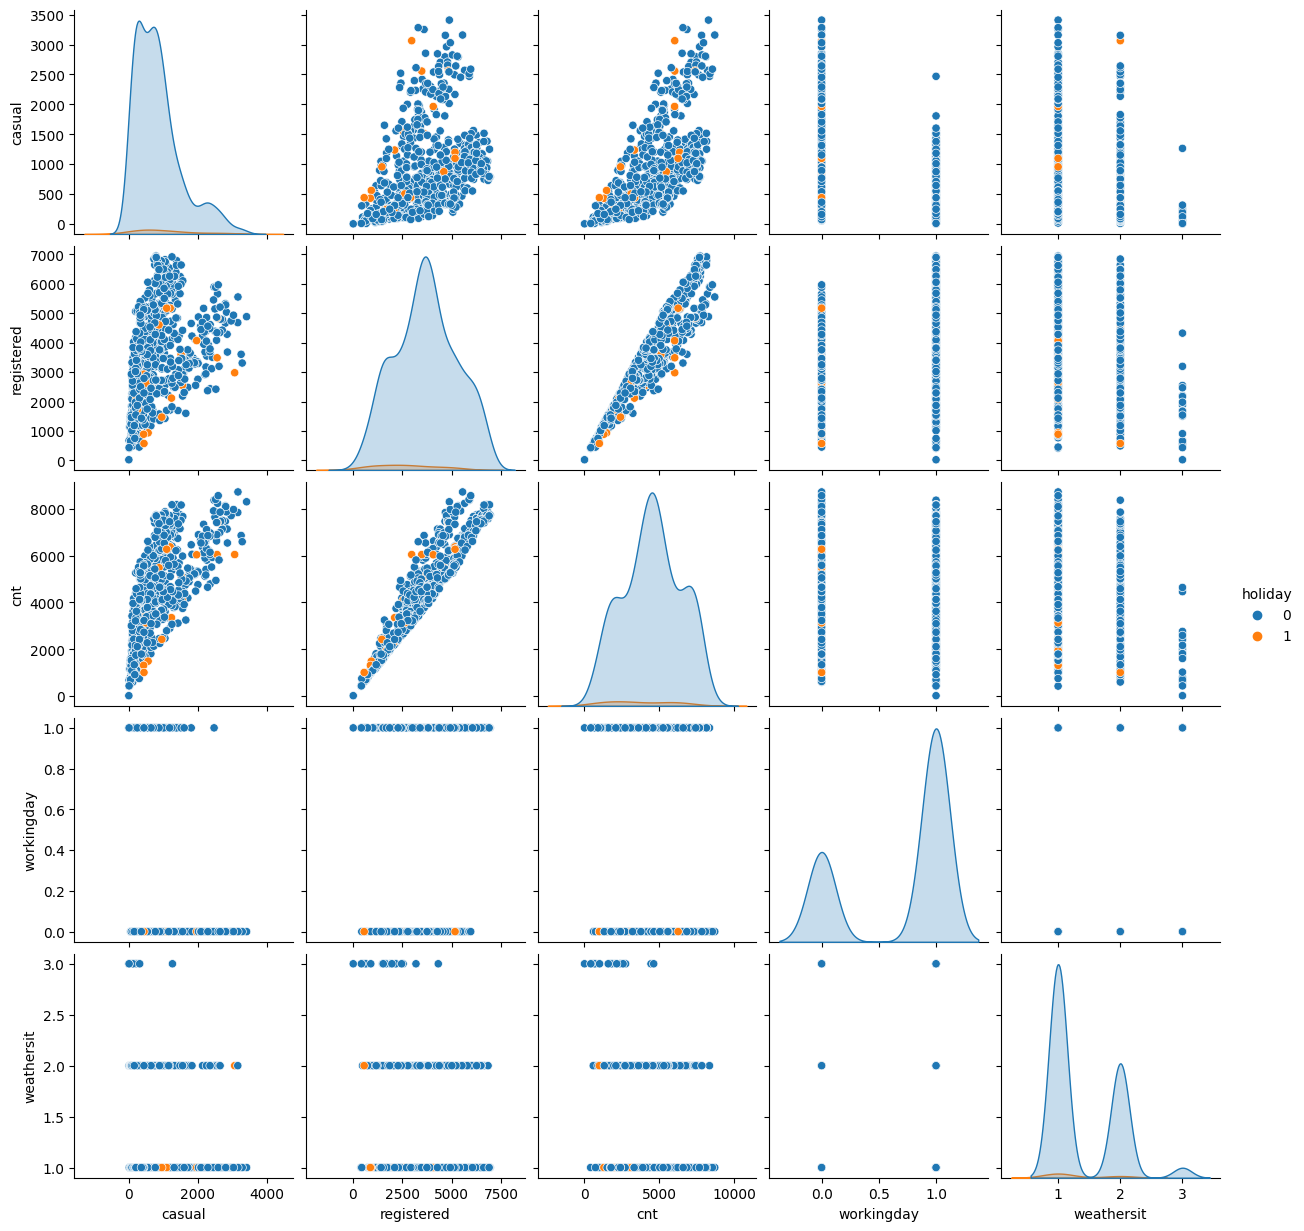

In [48]:
sns.pairplot(df_clientes, hue = 'holiday')

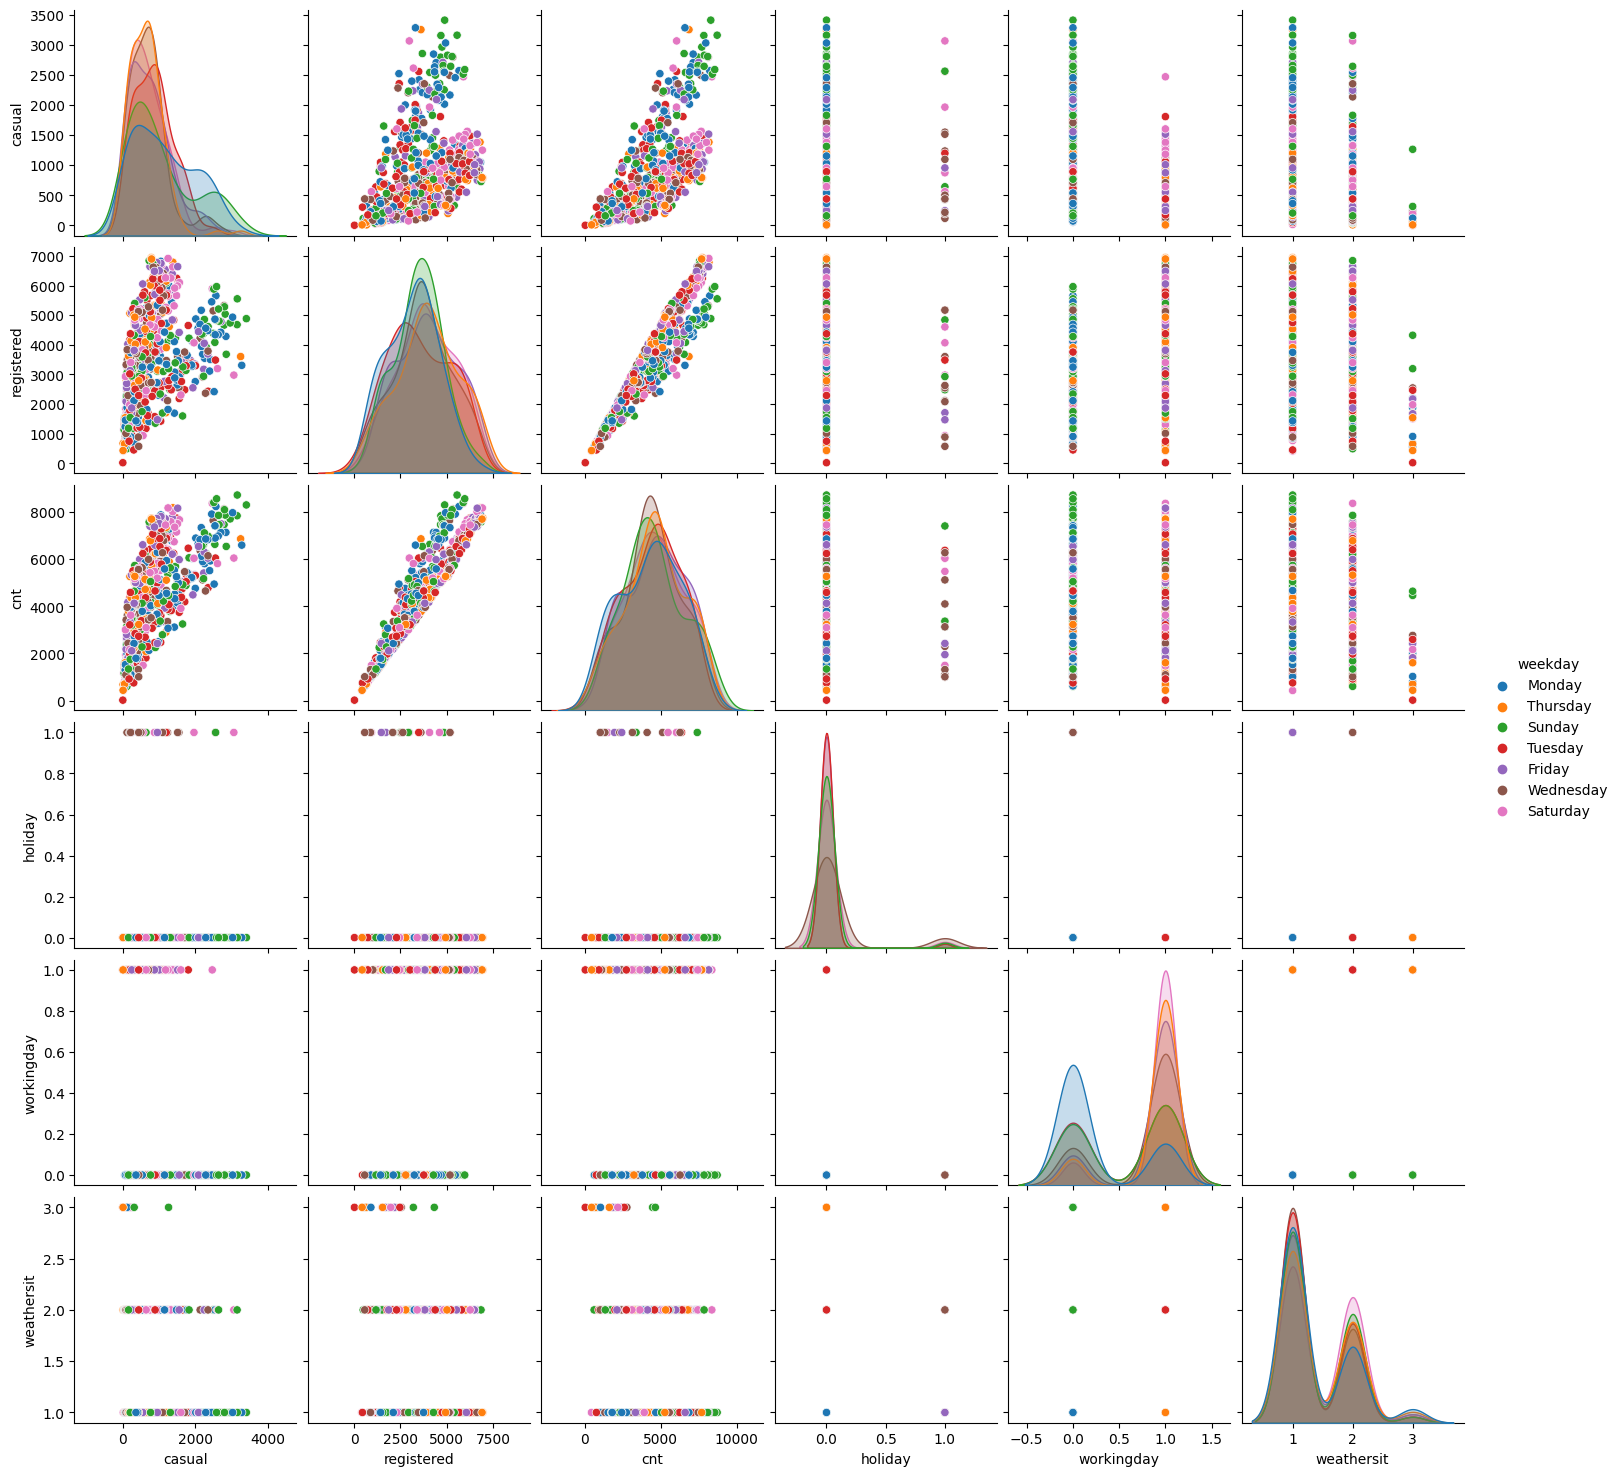

In [49]:
sns.pairplot(df_clientes, hue = 'weekday')

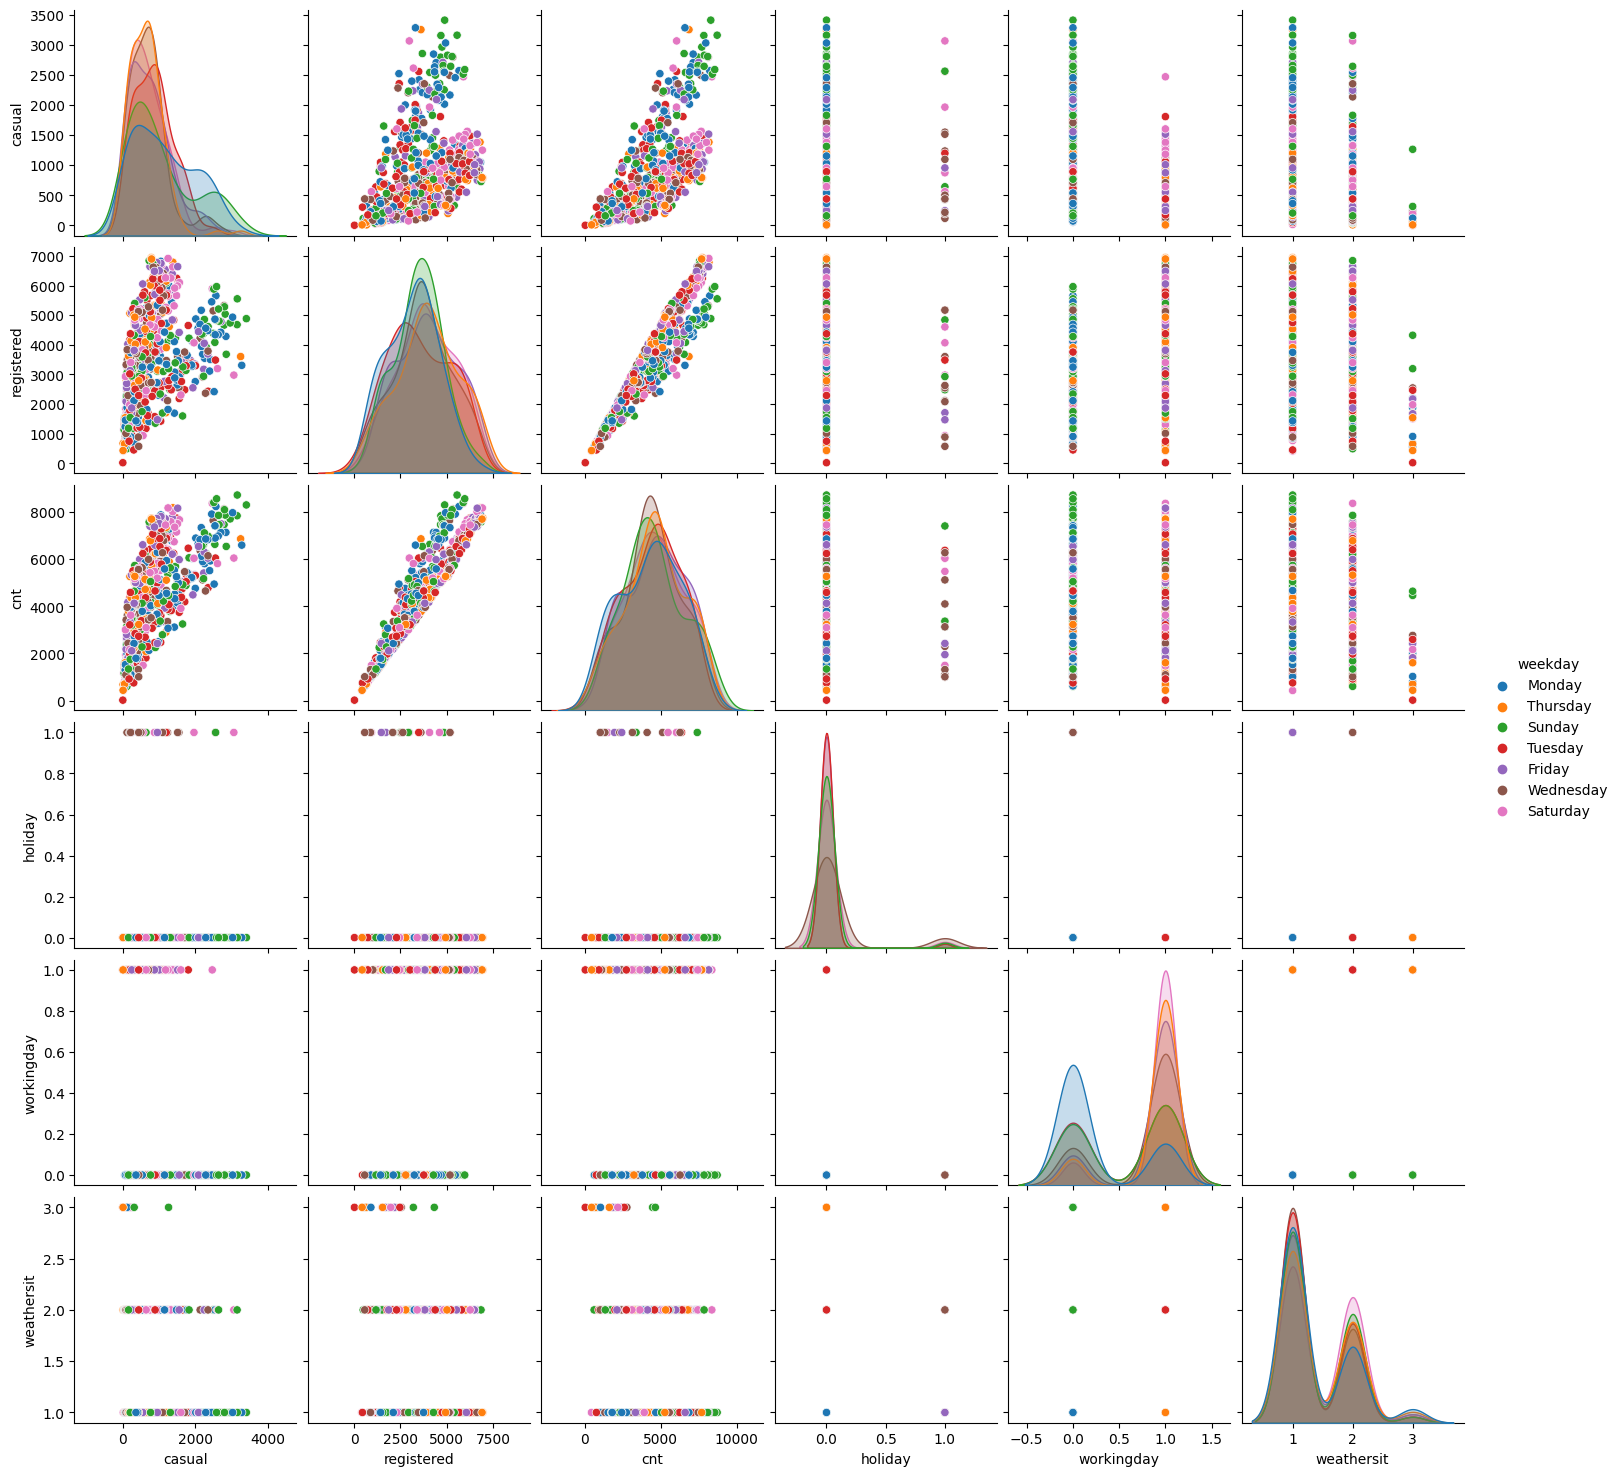

In [50]:
sns.pairplot(df_clientes, hue = 'weekday')

`Pasamos nuestras variables "categóricas" a formato category.`

In [51]:
df.head(3)

,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,month,year,day,season,casual_percent
0,0,Monday,0,2,14.110847,80.5833,10.749882,331,654,985,January,2018,1,Winter,33.60
1,0,Thursday,0,2,14.902598,69.6087,16.652113,131,670,801,February,2018,1,Winter,16.35
2,0,Thursday,1,1,8.050924,43.7273,16.636703,120,1229,1349,March,2018,1,Winter,8.90


In [52]:
df[['holiday', 'weekday', 'workingday', 'weathersit', 'day', 'month', 'year', 'season']] = df[['holiday', 'weekday', 'workingday', 'weathersit', 'day', 'month', 'year', 'season']].astype('category')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   holiday         730 non-null    category
 1   weekday         730 non-null    category
 2   workingday      730 non-null    category
 3   weathersit      730 non-null    category
 4   temp            730 non-null    float64 
 5   hum             730 non-null    float64 
 6   windspeed       730 non-null    float64 
 7   casual          730 non-null    int64   
 8   registered      730 non-null    int64   
 9   cnt             730 non-null    int64   
 10  month           730 non-null    category
 11  year            730 non-null    category
 12  day             730 non-null    category
 13  season          730 non-null    category
 14  casual_percent  730 non-null    float64 
dtypes: category(8), float64(4), int64(3)
memory usage: 54.0 KB


In [55]:
df.columns 

Index(['holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'month', 'year', 'day',
       'season', 'casual_percent'],
      dtype='object')

In [59]:
df_orden = df.reindex(columns = ['day', 'month', 'year', 'season', 'weekday', 'workingday', 'holiday', 'weathersit', 'temp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'casual_percent'])

In [61]:
df_orden.drop("casual_percent", axis = 1, inplace = True)

In [62]:
df_orden.to_csv("../datos/bikes_procesado.csv")